In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
x_train=train_datagen.flow_from_directory(r'C:\Users\LEGION\Desktop\Project Externship\Dataset\training_set',target_size=(64,64),
                                          class_mode='categorical',batch_size=900)

Found 15750 images belonging to 9 classes.


In [5]:
len(x_train)

18

In [6]:
x_test=test_datagen.flow_from_directory(r'C:\Users\LEGION\Desktop\Project Externship\Dataset\test_set',target_size=(64,64),
                                          class_mode='categorical',batch_size=900)

Found 2250 images belonging to 9 classes.


In [7]:
len(x_test)

3

In [8]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

Importing Libraries

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

Creating Model

In [10]:
model=Sequential()

Adding Layers

In [11]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Flatten())

In [14]:
##Hidden Layer 1
model.add(Dense(300,activation='relu'))
##Hidden Layer 2
model.add(Dense(150,activation='relu'))

Output Layer

In [15]:
model.add(Dense(9,activation='softmax'))

Compile the model

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Fit the model

In [17]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

C:\Users\LEGION\AppData\Local\Temp/ipykernel_24492/234118701.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
18/18 [==============================] - 50s 3s/step - loss: 1.3134 - accuracy: 0.5780 - val_loss: 0.4696 - val_accuracy: 0.8787
Epoch 2/10
18/18 [==============================] - 49s 3s/step - loss: 0.3442 - accuracy: 0.9060 - val_loss: 0.3401 - val_accuracy: 0.9191
Epoch 3/10
18/18 [==============================] - 50s 3s/step - loss: 0.1466 - accuracy: 0.9592 - val_loss: 0.2585 - val_accuracy: 0.9418
Epoch 4/10
18/18 [==============================] - 50s 3s/step - loss: 0.0797 - accuracy: 0.9782 - val_loss: 0.2345 - val_accuracy: 0.9502
Epoch 5/10
18/18 [==============================] - 49s 3s/step - loss: 0.0494 - accuracy: 0.9865 - val_loss: 0.2327 - val_accuracy: 0.9631
Epoch 6/10
18/18 [==============================] - 48s 3s/step - loss: 0.0317 - accuracy: 0.9929 - val_loss: 0.2524 - val_accuracy: 0.9760
Epoch 7/10
18/18 [==============================] - 49s 3s/step - loss: 0.0267 - accuracy: 0.9932 - val_loss: 0.2736 - val_accuracy: 0.9702
Epoch 8/10
18/18 [==

Save the model

In [18]:
model.save('HandSign.h5')

Testing the model

In [19]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [20]:
model=load_model('HandSign.h5')
img=image.load_img(r'C:\Users\LEGION\Desktop\Project Externship\Dataset\test_set\B\2.png',
                   target_size=(64,64))

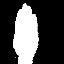

In [21]:
img

In [22]:
x=image.img_to_array(img)

In [23]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [24]:
x.ndim

3

In [25]:
x=np.expand_dims(x,axis=0)

In [26]:
x

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [27]:
x.ndim

4

In [28]:
pred=np.argmax(model.predict(x),axis=1)

In [29]:
pred

array([1], dtype=int64)

In [30]:
index=['A','B','C','D','E','F','G','H','I']
print(index[pred[0]])

B


Open CV

In [31]:
import cv2

In [32]:
img=cv2.imread(r'C:\Users\LEGION\Desktop\Project Externship\Dataset\test_set\B\2.png',1)

In [33]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [34]:
img1=cv2.imread(r'C:\Users\LEGION\Desktop\Project Externship\Dataset\test_set\B\2.png',0)

In [35]:
img1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [36]:
print(img.shape)

(64, 64, 3)


In [37]:
img=cv2.imread(r'C:\Users\LEGION\Desktop\Project Externship\Dataset\test_set\B\2.png',1)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

CNN Video Analysis

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('HandSign.h5')
video=cv2.VideoCapture(0)
index=['A','B','C','D','E','F','G','H','I']
while 1:
    succes,frame=video.read()
    cv2.imwrite('image.jpg',frame)
    img=image.load_img('image.jpg',target_size=(64,64))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    pred=np.argmax(model.predict(x),axis=1)
    y=pred[0]
    cv2.putText(frame,'The Predicted Alphabet is: '+str(index[y]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4)
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()  